In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# 加载MNIST数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 标准化图像数据到0-1范围
x_train, x_test = x_train / 255.0, x_test / 255.0

# 添加一个通道维度
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8924 - loss: 0.3440 - val_accuracy: 0.9825 - val_loss: 0.0534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9845 - loss: 0.0477 - val_accuracy: 0.9891 - val_loss: 0.0335
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9874 - val_loss: 0.0378
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9918 - loss: 0.0244 - val_accuracy: 0.9921 - val_loss: 0.0238
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9935 - loss: 0.0202 - val_accuracy: 0.9901 - val_loss: 0.0319


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - 3ms/step - accuracy: 0.9901 - loss: 0.0319

Test accuracy: 0.9901000261306763


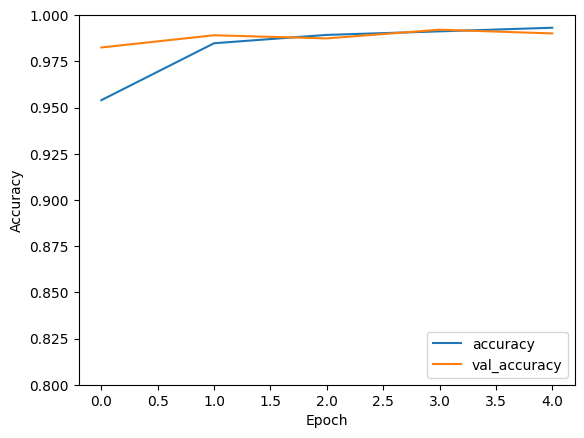

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()


In [8]:
# 获取测试集中的第一张图片
import numpy as np
img = x_test[0]

# 为模型添加一个批次维度
img = (np.expand_dims(img, 0))

predictions = model.predict(img)
print(f'Predicted digit: {np.argmax(predictions)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted digit: 7


In [9]:
img = x_test[0]
img.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'